<a href="https://colab.research.google.com/github/omajipawar/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_(Omaji_Pawar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
#Importing python packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
#Working directory path
file_path = '/content/drive/MyDrive/csv files/Online Retail (1).xlsx'

In [ ]:
#Reading the dataset
df= pd.read_excel(file_path)

## Data Exploration

In [ ]:
#First five rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Last five rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
#Shape of dataframe
df.shape

(541909, 8)

There are total 541909 rows and 8 columns in the dataset.

In [ ]:
#Basic info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#Descriptive Summary of dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleaning and Feature Engineering

In [ ]:
#Dropping duplicates
print("Shape before dropping duplicates", df.shape)
df = df.drop_duplicates()
print("Shape after dropping duplicates", df.shape)

Shape before dropping duplicates (541909, 8)
Shape after dropping duplicates (536641, 8)


Looking for and handling NaN values

In [ ]:
#Check for null values in each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [ ]:
# Droping rows having missing values

df = df.dropna()
df.shape

(401604, 8)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Transactions with a letter 'C' at the beginning of its invoice numbers are canceled transactions, so we drop them.

In [ ]:
# Drop cancelled transactions
indx = df.InvoiceNo[df.InvoiceNo.str.contains('C') == True].index
df.drop(index= indx, inplace= True)

Some transaction have a sale price of zero, these could be free gifts for some customers and not true sales transaction. So, we will drop them.

In [ ]:
# Drop transactions with price zero
indx = df.loc[df.UnitPrice== 0].index
df.drop(index= indx, inplace= True)

In [ ]:
# Changing the datatype of Customer Id as per Business understanding

df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
# Changing the datatype of "InvoiceDate" column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

#Creating new variables year, month and day
df['year']= df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day

In [ ]:
#Creating new column showing the total amount spend on each transaction
df['total_amount'] = df['UnitPrice']*df['Quantity']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34


## EDA and Visualization

**1. How many orders (per month)?**

In [ ]:
#Get the number of orders per month
df.groupby('month')['InvoiceNo'].count().sort_values(ascending=False).reset_index()

,month,InvoiceNo
0,11,63168
1,10,48793
2,12,42696
3,9,39669
4,5,28073
5,6,26926
6,3,26870
7,8,26790
8,7,26580
9,4,22433


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


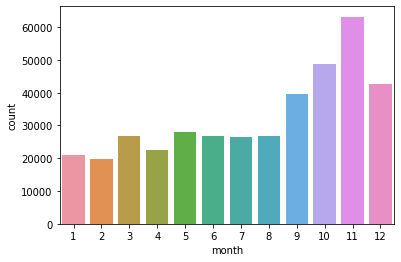

In [ ]:
#Plotting a countplot of month wise orders
sns.countplot(df['month'])

* We can see that the months with higher sales were oct, nov and dec.

**2. What products are in the top 5 in revenue?**

In [ ]:
#Getting the top 5 products with highest revenue
top_5_products = df.groupby('Description')['total_amount'].sum().sort_values(ascending=False).reset_index().head()
top_5_products

,Description,total_amount
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,REGENCY CAKESTAND 3 TIER,142264.75
2,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
3,JUMBO BAG RED RETROSPOT,85040.54
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73


[Text(0, 0, 'PAPER CRAFT , LITTLE BIRDIE'),
 Text(0, 0, 'REGENCY CAKESTAND 3 TIER'),
 Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
 Text(0, 0, 'JUMBO BAG RED RETROSPOT'),
 Text(0, 0, 'MEDIUM CERAMIC TOP STORAGE JAR')]

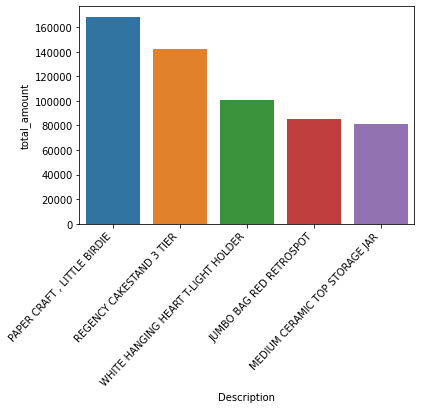

In [ ]:
#Plotting a bar plot showing top 5 products with highest revenue
ax= sns.barplot(x='Description',y='total_amount',data=top_5_products)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")

**3. In which months the sales were higher?**

In [32]:
Total_per_month=df.groupby(['year','month'])['total_amount'].sum()
Total_per_month

year  month
2010  12       496477.340
2011  1        440876.330
      2        354618.200
      3        465784.190
      4        408733.111
      5        550359.350
      6        523775.590
      7        484545.591
      8        497194.910
      9        794806.692
      10       821220.130
      11       975251.390
      12       471381.820
Name: total_amount, dtype: float64

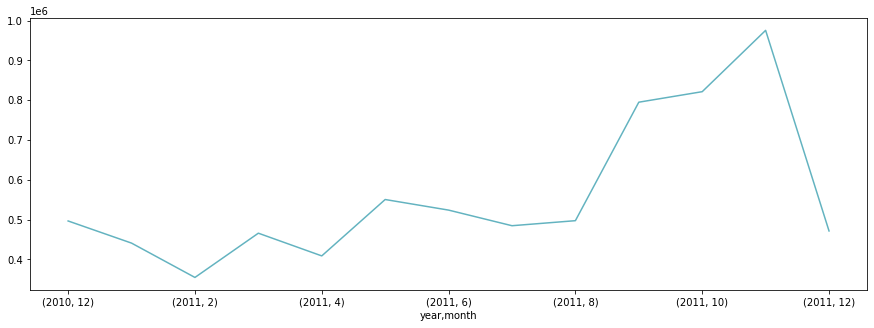

In [35]:
Total_per_month.plot(kind='line', color='#63b3c0',figsize=(15,5))

**4. What's the total revenue per country?**

In [ ]:
df.groupby('Country')['total_amount'].sum().sort_values(ascending=False).reset_index()

,Country,total_amount
0,United Kingdom,7285024.644
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


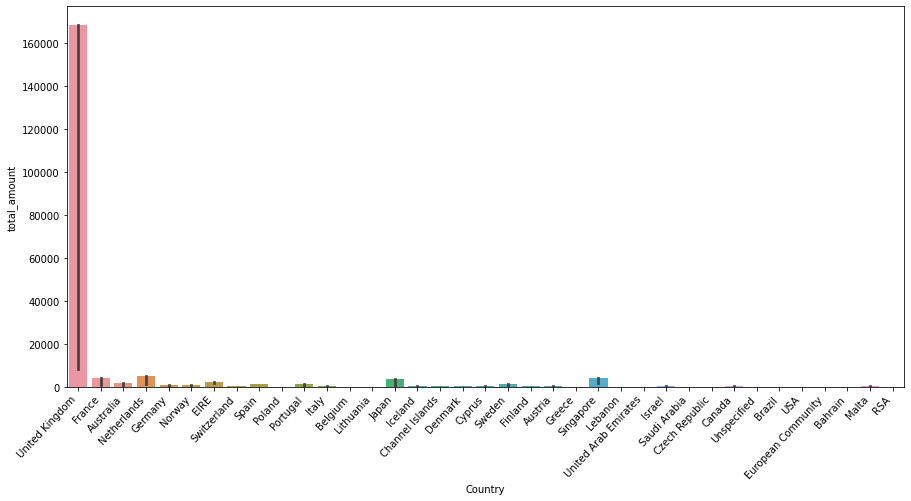

In [ ]:
#Plotting a bar plot showing country wise total amount
plt.figure(figsize=(15,7))
ax=sns.barplot(x='Country', y='total_amount',data=df,estimator=max)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

* As expected, the company receives the highest number of orders in the UK (since it is a UK based company).